In [14]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime
from matplotlib.dates import date2num

In [15]:
#Glucose Datasets
subject1=pd.read_csv('data-01.csv',index_col=0,parse_dates=[['Column1','Column2']])
subject2=pd.read_csv('data-02.csv',names=['Date','Time','Code','Glucose(mg/dl)-Subject 2'],index_col=0,parse_dates=[['Date','Time']])
subject3=pd.read_csv('data-30.csv',index_col=0,parse_dates=[['Column1','Column2']])

In [16]:
#Rename Column Names
subject1.rename(columns={'Column1_Column2':'Date','Column3':'Code','Column4':'Glucose(mg/dl)-Subject 1'},inplace=True)
subject3.rename(columns={'Column1_Column2':'Date','Column3':'Code','Column4':'Glucose(mg/dl)-Subject 3'},inplace=True)

In [17]:
#Clean Dataset for Subject 2
subject2=subject2[subject2["Glucose(mg/dl)-Subject 2"]!="0Hi"]
subject2=subject2[subject2["Glucose(mg/dl)-Subject 2"]!="0Lo"]

In [18]:
subject2["Glucose(mg/dl)-Subject 2"]=pd.to_numeric(subject2["Glucose(mg/dl)-Subject 2"])

In [19]:
#Changing index names
subject1.index.names=["Datetime"]
subject2.index.names=["Datetime"]
subject3.index.names=["Datetime"]

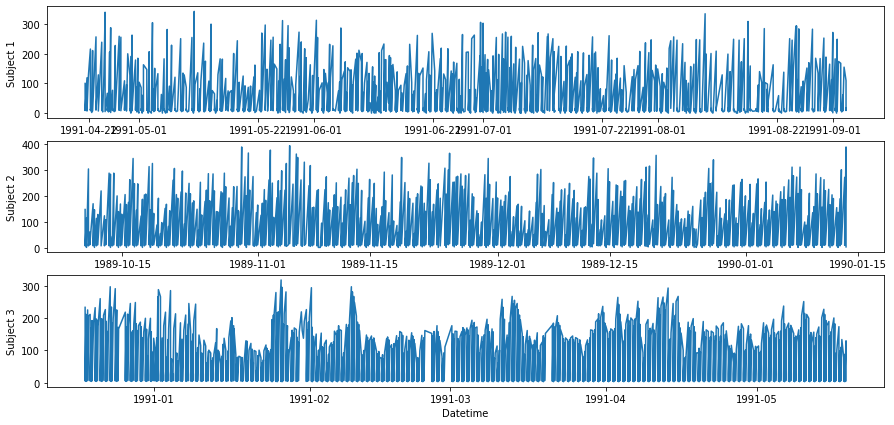

In [20]:
fig,axes=plt.subplots(3,figsize=(15, 7))
axes[0].plot(subject1.index,subject1["Glucose(mg/dl)-Subject 1"])
axes[1].plot(subject2.index,subject2["Glucose(mg/dl)-Subject 2"])
axes[2].plot(subject3.index,subject3["Glucose(mg/dl)-Subject 3"])
axes[0].set_ylabel("Subject 1")
axes[1].set_ylabel("Subject 2")
axes[2].set_ylabel("Subject 3")
axes[2].set_xlabel("Datetime");


In [21]:
#Resample to daily frequency aggregating mean
subject1_daily_mean=subject1["Glucose(mg/dl)-Subject 1"].resample("D").mean()
subject2_daily_mean=subject2["Glucose(mg/dl)-Subject 2"].resample("D").mean()
subject3_daily_mean=subject3["Glucose(mg/dl)-Subject 3"].resample("D").mean()
#Resample to weekly frequency aggregating mean
subject1_weekly_mean=subject1["Glucose(mg/dl)-Subject 1"].resample("W").mean()
subject2_weekly_mean=subject2["Glucose(mg/dl)-Subject 2"].resample("W").mean()
subject3_weekly_mean=subject3["Glucose(mg/dl)-Subject 3"].resample("W").mean()

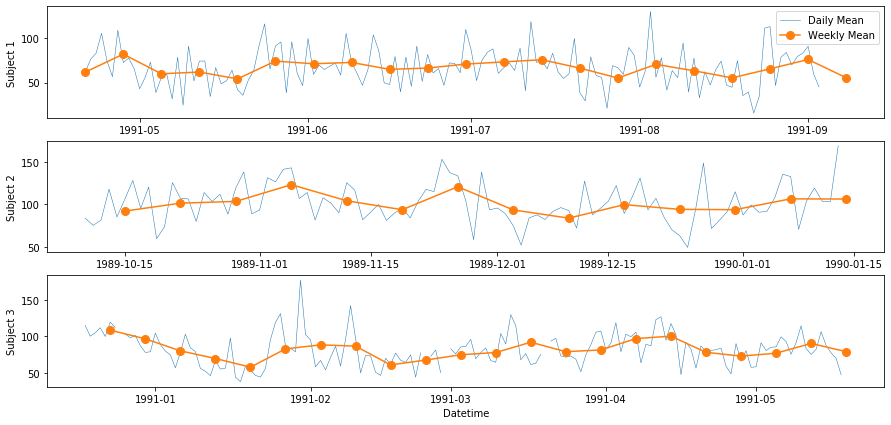

In [22]:
#Daily and Weekly Resample Plot for Subject1
fig,ax=plt.subplots(3,figsize=(15,7))
ax[0].plot(subject1_daily_mean,linestyle="-",linewidth=0.5,label="Daily Mean")
ax[0].plot(subject1_weekly_mean,marker="o",markersize=8,linestyle="-",label="Weekly Mean")
ax[0].set_ylabel("Subject 1")
ax[0].legend()
ax[1].plot(subject2_daily_mean,linestyle="-",linewidth=0.5,label="Daily Mean")
ax[1].plot(subject2_weekly_mean,marker="o",markersize=8,linestyle="-",label="Weekly Mean")
ax[1].set_ylabel("Subject 2")
ax[2].plot(subject3_daily_mean,linestyle="-",linewidth=0.5,label="Daily Mean")
ax[2].plot(subject3_weekly_mean,marker="o",markersize=8,linestyle="-",label="Weekly Mean")
ax[2].set_ylabel("Subject 3")
ax[2].set_xlabel("Datetime");